In [97]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random

df = pd.read_csv('myexcel.csv')

# Preprocessing:
for x in df.index:
    df.loc[x, "Height"] = random.randint(150, 180)

print(df.to_string())


                         Name                    Team  Number Position  Age Height  Weight                College      Salary
0               Avery Bradley          Boston Celtics       0       PG   25    158     180                  Texas   7730337.0
1                 Jae Crowder          Boston Celtics      99       SF   25    174     235              Marquette   6796117.0
2                John Holland          Boston Celtics      30       SG   27    163     205      Boston University         NaN
3                 R.J. Hunter          Boston Celtics      28       SG   22    173     185          Georgia State   1148640.0
4               Jonas Jerebko          Boston Celtics       8       PF   29    173     231                    NaN   5000000.0
5                Amir Johnson          Boston Celtics      90       PF   29    159     240                    NaN  12000000.0
6               Jordan Mickey          Boston Celtics      55       PF   21    160     235                    LSU   11

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB
None


In [96]:
# Analysis Tasks:
"""1. Determine the distribution of employees across each team and 
    calculate the percentage split relative to the total number of employees."""


# Total number of employee
total = len(df)

# Number of Employees per Team:
team_count = df["Team"].value_counts()

# Percentage Split for Each Team:
for team, count in team_count.items():

    percentage = (count/total) * 100

    print(f"{team}: {count} employees, which is {percentage}% of the total.")
    

New Orleans Pelicans: 19 employees, which is 4.148471615720524% of the total.
Memphis Grizzlies: 18 employees, which is 3.9301310043668125% of the total.
Utah Jazz: 16 employees, which is 3.4934497816593884% of the total.
New York Knicks: 16 employees, which is 3.4934497816593884% of the total.
Milwaukee Bucks: 16 employees, which is 3.4934497816593884% of the total.
Brooklyn Nets: 15 employees, which is 3.2751091703056767% of the total.
Portland Trail Blazers: 15 employees, which is 3.2751091703056767% of the total.
Oklahoma City Thunder: 15 employees, which is 3.2751091703056767% of the total.
Denver Nuggets: 15 employees, which is 3.2751091703056767% of the total.
Washington Wizards: 15 employees, which is 3.2751091703056767% of the total.
Miami Heat: 15 employees, which is 3.2751091703056767% of the total.
Charlotte Hornets: 15 employees, which is 3.2751091703056767% of the total.
Atlanta Hawks: 15 employees, which is 3.2751091703056767% of the total.
San Antonio Spurs: 15 employee

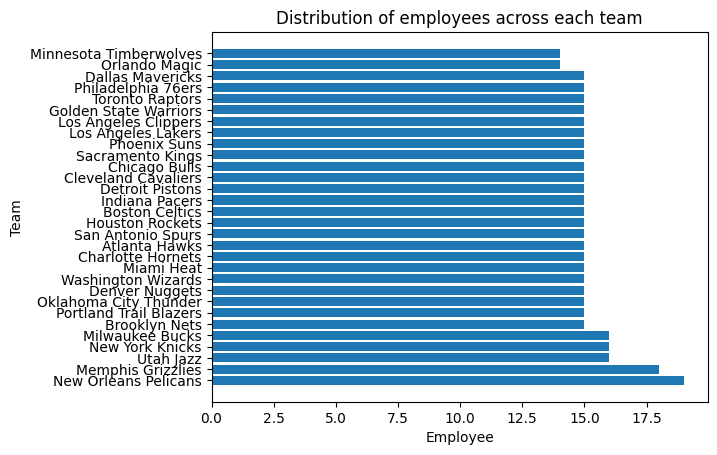

In [105]:


team = np.array([])
count = np.array([])

for t, c in team_count.items():
    team = np.append(team, t)
    count = np.append(count, c)

# Title and labels
plt.title("Distribution of employees across each team")
plt.xlabel("Employee")
plt.ylabel("Team")
plt.barh(team, count)
plt.show()

In [110]:
"""2. Segregate employees based on their positions within the company."""

# Group by Position
position = df.groupby("Position")["Name"].count().reset_index()

print(position)

  Position  Name
0        C    79
1       PF   100
2       PG    92
3       SF    85
4       SG   102


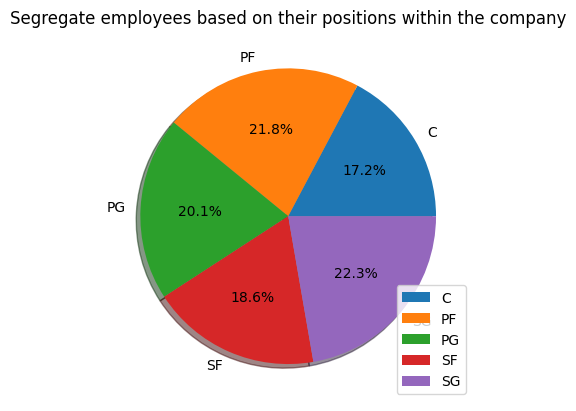

In [118]:
# Pie chart

count = position["Name"]
positions = position["Position"]


# Title and labels
plt.title("Segregate employees based on their positions within the company")
plt.pie(count, labels = positions, autopct="%1.1f%%", shadow = True)
plt.legend()
plt.show() 


In [134]:
"""3. Identify the predominant age group among employees."""

# Age group 18 to 25
print("18-24 : ", len(df.query("Age >= 18 & Age <= 24")))

# Age group 26 to 35
print("25-35 : ", len(df.query("Age >= 25 & Age <= 35")))

# Age group 35 to 45
print("36-45 : ", len(df.query("Age >= 36 & Age <= 45")))


18-25 :  154
25-35 :  281
36-45 :  23


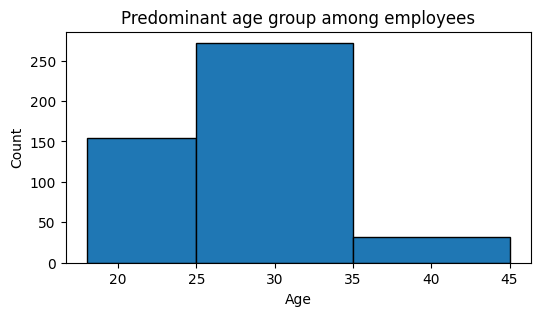

In [138]:
# Histogram

age = df["Age"]


plt.figure(figsize=(6, 3))
plt.hist(age, bins=[18, 25, 35, 45], edgecolor="black")
# Title and labels
plt.title("Predominant age group among employees")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [68]:
"""4. Discover which team and position have the highest salary expenditure."""

# Total salary expenditure by team
team_salary = df.groupby("Team")["Salary"].sum().reset_index()

# To find the index of the team with the highest salary expenditure.
index = team_salary["Salary"].idxmax()

print("Team with the highest salary expenditure:\n", team_salary.loc[index])



# Total salary expenditure by position
position_salary = df.groupby("Position")["Salary"].sum().reset_index()

# To find the index of the position with the highest salary expenditure.
index = position_salary["Salary"].idxmax()

print("Position with the highest salary expenditure:\n", position_salary.loc[index])


Team with the highest salary expenditure:
 Team      Cleveland Cavaliers
Salary            106988689.0
Name: 5, dtype: object
Position with the highest salary expenditure:
 Position              C
Salary      466377332.0
Name: 0, dtype: object


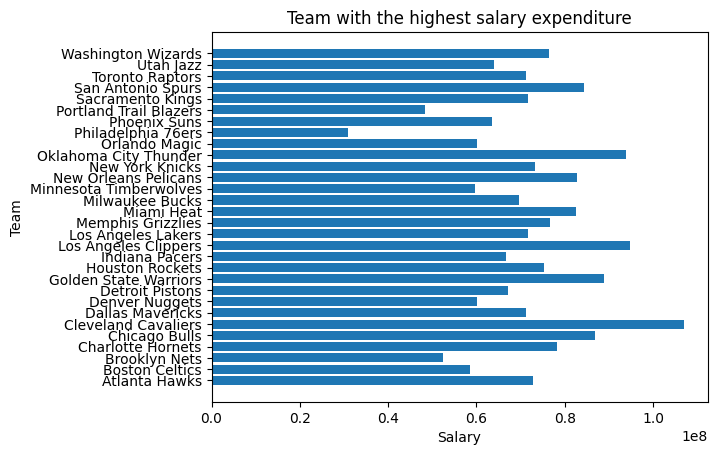

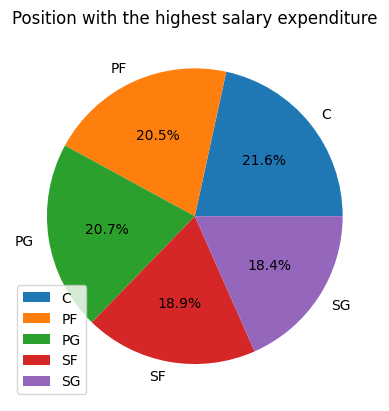

In [145]:

team = team_salary["Team"]
salary = team_salary["Salary"]

# Title and labels
plt.title("Team with the highest salary expenditure")
plt.xlabel("Salary")
plt.ylabel("Team")
plt.barh(team, salary)
plt.show()

salary = position_salary["Salary"]
position = position_salary["Position"]


# Title and labels
plt.title("Position with the highest salary expenditure")
plt.pie(salary, labels = position, autopct="%1.1f%%")
plt.legend()
plt.show() 

In [146]:
"""5. Investigate if there's any correlation between age and salary, and represent it visually."""

correlation = df["Age"].corr(df["Salary"])
print(f"Correlation between Age and Salary: {correlation}")



Correlation between Age and Salary: 0.21400941226570985


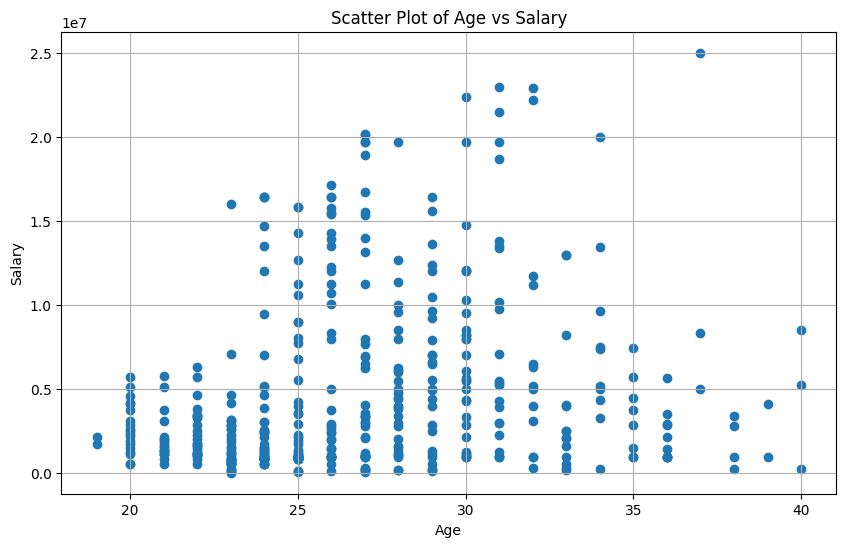

In [147]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df["Age"], df["Salary"])

# Title and labels
plt.title("Scatter Plot of Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()